# Physics 129 Final Project #1

# Discovery of the Higgs Boson using ATLAS Data

## Introduction

The discovery of the Higgs Boson was announced simultaneously by the ATLAS and CMS collaborations on July 4, 2012.  This project will focus on one of the channels used by ATLAS for this discovery:  $h\rightarrow \gamma \gamma$.  

ATLAS is a general-purpose detector at the Large Hadron Collider (LHC). It has a broad physics programme ranging from studying the Standard Model (including the Higgs boson) to searching for extra dimensions and particles that could make up dark matter. Although it has the same scientific goals as the CMS experiment, it uses different technical solutions and a different magnet-system design.

A schematic picture of ATLAS is provided below.

<img src="ATLAS.png" alt="Drawing" style="width: 600px;"/>

## Goals

The goal of this project is to find the mass peak corresponding to the Higgs boson using the ATLAS data.  The strategy for doing this measurement is described in Section 5 of the ATLAS Higgs discovery paper https://arxiv.org/pdf/1207.7214.pdf   You should read this section carefully and use it as a guide for your analysis.

## The Dataset

The data used for the Higgs discovery consisted of  4.8 fb$^{−1}$ collected at $\sqrt{s}=7$ TeV in 2011 and 5.8 fb$^{−1}$ at $\sqrt{s}=8$ TeV in 2012.  All events passing a final selection (described in the discovery paper) containing two photon candidates passing the final event and photon selection are contained in two files: Higgs2011.csv and Higgs2012.csv.  These files can be read using the python code below:

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parse the input file.  You can change to the other file by uncommenting the second line
file1 = "Higgs2011.csv"
#file = "Higgs2012.csv"

#vtx_z = []
invariant_mass_2011 = []
#ph_pt_leading = []
#ph_pt_subleading = []
#ph_eta_corrected_leading = []
#ph_eta_corrected_subleading = []
#ph_phi_leading = []
#ph_phi_subleading = []
categ_Model10Categories_2011 = [] 


for line in open(file1,"r"):
    line = line.strip()
    if line[0]=="#":
        print(line)
        continue
    info = line.split(",")
#    vtx_z.append(info[0])
    invariant_mass_2011.append(info[1])
#    ph_pt_leading.append(info[2])
#    ph_pt_subleading.append(info[3])
#    ph_eta_corrected_leading.append(info[4])
#    ph_eta_corrected_subleading.append(info[5])
#    ph_phi_leading.append(info[6])
#    ph_phi_subleading.append(info[7])
    categ_Model10Categories_2011.append(info[8])

#
# This file contains data used in  the ATLAS Higgs discovery paper https://arxiv.org/pdf/1207.7214.pdf
# These data are the diphoton candidates from the 2011 7 TeV data taking period
# For each event, the following information is provided
#vtx_z:  The z-positon of the pp interaction in mm (center of detector is 0,0,0)
#invariant_mass:  The diphoton invariant mass in GeV
#ph_pt_leading:  Transverse momentum (in GeV)  of the highest pT photon in the event
#ph_pt_subleading: Transverse momentum (in GeV)  of the next to highest pT photon in the event
#ph_eta_corrected_leading: Pseudorapidity of the highest pT photon in the event
#ph_eta_corrected_subleading: Pseudorapidity of the next to highest pT photon in the event
#ph_phi_leading: Phi of the highest pT photon in the event
#ph_phi_subleading: Phi of the next to highest pT photon in the event
#categ_Model10Categories: Category of the event where the category is defined in Section 5.3 of the discovery paper. Categories are labeled 1 thr

In [10]:
len(categ_Model10Categories_2011)

23788

In [11]:
file2 = "Higgs2012.csv"

invariant_mass_2012 = []
categ_Model10Categories_2012 = []

for line in open(file2,"r"):
    line = line.strip()
    if line[0]=="#":
        print(line)
        continue
    info = line.split(",")
#    vtx_z.append(info[0])
    invariant_mass_2012.append(info[1])
#    ph_pt_leading.append(info[2])
#    ph_pt_subleading.append(info[3])
#    ph_eta_corrected_leading.append(info[4])
#    ph_eta_corrected_subleading.append(info[5])
#    ph_phi_leading.append(info[6])
#    ph_phi_subleading.append(info[7])
    categ_Model10Categories_2012.append(info[8])

#
# This file contains data used in  the ATLAS Higgs discovery paper https://arxiv.org/pdf/1207.7214.pdf
# These data are the diphoton candidates from the 2012 8 TeV data taking period
# For each event, the following information is provided
#vtx_z:  The z-positon of the pp interaction in mm (center of detector is 0,0,0)
#invariant_mass:  The diphoton invariant mass in GeV
#ph_pt_leading:  Transverse momentum (in GeV)  of the highest pT photon in the event
#ph_pt_subleading: Transverse momentum (in GeV)  of the next to highest pT photon in the event
#ph_eta_corrected_leading: Pseudorapidity of the highest pT photon in the event
#ph_eta_corrected_subleading: Pseudorapidity of the next to highest pT photon in the event
#ph_phi_leading: Phi of the highest pT photon in the event
#ph_phi_subleading: Phi of the next to highest pT photon in the event
#categ_Model10Categories: Category of the event where the category is defined in Section 5.3 of the discovery paper. Categories are labeled 1 thr

In [12]:
len(categ_Model10Categories_2012)

35251

In [13]:
#strings to floats
invariant_mass_2011 = [float(invariant_mass_2011[i]) for i in range(len(invariant_mass_2011))]
invariant_mass_2012 = [float(invariant_mass_2012[i]) for i in range(len(invariant_mass_2012))]
categ_Model10Categories_2011 = [float(categ_Model10Categories_2011[i]) 
                                for i in range(len(categ_Model10Categories_2011))]
categ_Model10Categories_2012 = [float(categ_Model10Categories_2012[i]) 
                                for i in range(len(categ_Model10Categories_2012))]

#Turn lists into arrays
invariant_mass_2011 = np.array(invariant_mass_2011)
invariant_mass_2012 = np.array(invariant_mass_2012)
categ_Model10Categories_2011 = np.array(categ_Model10Categories_2011)
categ_Model10Categories_2012 = np.array(categ_Model10Categories_2012)

#merge the two data sets
invariant_mass = np.concatenate((invariant_mass_2011,invariant_mass_2012))
categ_Model10Categories = np.concatenate((categ_Model10Categories_2011,categ_Model10Categories_2012))

For those of you who prefer to do your analysis using root, the same data are also available in files Higgs1011.root and Higgs2012.root (warning: the ntuple and branch names differ between the 2011 and 2012 data files).

For this project, you will only need to use the invariant mass and category for each event.  The other variables are provided in case you want to explore further.

As a starting point, verify that you can reproduce the number of candidate events in each category and for each year in Table 4 of the Higgs discovery paper

Now, you are free to perform your analysis as you wish.  You will find that the signal significance is greatly improved if you analyse each category separately and combine the reults.  For this analysis, uou should use as input the expected width of the Higgs mass peak in each category.

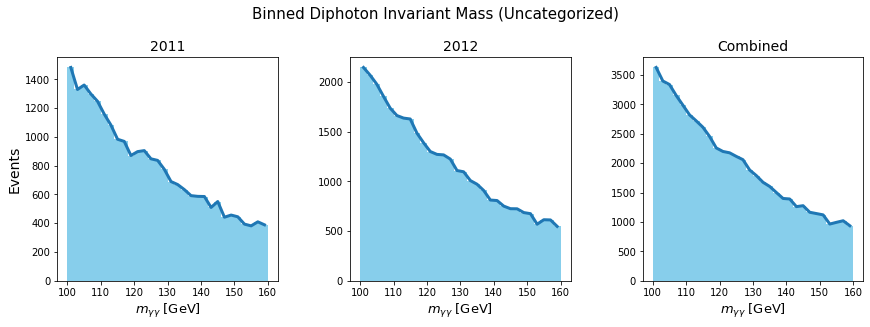

In [14]:
fig,axs = plt.subplots(1,3,figsize=(13,5))
fig.suptitle('Binned Diphoton Invariant Mass (Uncategorized)',size=15)
n1,b1,p1 = axs[0].hist(invariant_mass_2011,bins=30,color='skyblue')
n2,b2,p2 = axs[1].hist(invariant_mass_2012,bins=30,color='skyblue')
n3,b3,p3 = axs[2].hist(invariant_mass,bins=30,color='skyblue')

b1 = (b1[:-1] + b1[1:]) / 2
b2 = (b2[:-1] + b2[1:]) / 2
b3 = (b3[:-1] + b3[1:]) / 2

axs[0].plot(b1,n1,linewidth=3)
axs[1].plot(b2,n2,linewidth=3)
axs[2].plot(b3,n3,linewidth=3)

axs[0].set_title('2011',size=14)
axs[1].set_title('2012',size=14)
axs[2].set_title('Combined',size=14)

axs[0].set_ylabel('Events',size=14)
axs[0].set_xlabel('$m_{\gamma\gamma}$ [GeV]',size=13)
axs[1].set_xlabel('$m_{\gamma\gamma}$ [GeV]',size=13)
axs[2].set_xlabel('$m_{\gamma\gamma}$ [GeV]',size=13)

fig.tight_layout(pad=4)

#plt.savefig('Uncat_bins.png')

In [15]:
from math import factorial

def bernstein4_null(x,k,v,A,B):  #null hypothesis
    v=int(v)
    bpoly = 24/(factorial(v)*factorial(4-v))*((k*x/160)**v)*(1-k*x/160)**4
    bpoly = A*bpoly + B 
    return bpoly

poptbn, pcove = curve_fit(bernstein4_null, b3, n3)
poptbn

/Users/ufukparildar/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([7.54969523e-01, 1.00000000e+00, 2.01194759e+04, 7.00094845e+02])

In [16]:
def signal(x,mu,sig,C,k,v,A,B):
    
    gaus= C*(1/sig/np.sqrt(2*np.pi))*np.exp(-((x-mu)**2)/(2*sig*sig))
    v=int(v)
    bpoly = 24/(factorial(v)*factorial(4-v))*((k*x/160)**v)*(1-k*x/160)**4
    bpoly = A*bpoly + B
    signal = bpoly + gaus 
    return signal

poptsignal_unc, pcove = curve_fit(signal, b3, n3,p0=[127,2,100,1,1,2e4,7e2])
poptsignal_unc

array([1.26998463e+02, 2.79394504e+00, 9.60449230e+02, 7.79327217e-01,
       1.00000000e+00, 2.15044878e+04, 7.80684712e+02])

In [17]:
#fwhm unc
poptsignal_unc[1]*2*np.sqrt(2*np.log(2))

6.579237774080975

Text(0.5, 1.0, 'Diphoton Invariant Mass (Unweighted)')

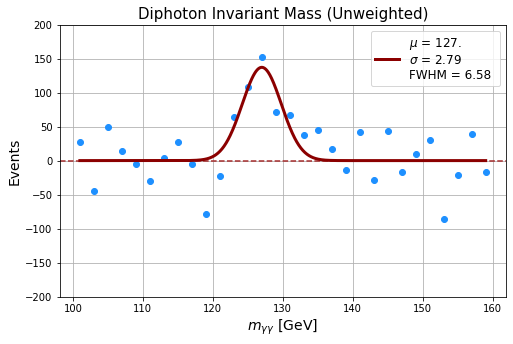

In [18]:
plt.figure(figsize=(8,5))

gaus_unc= 9.6e2*(1/2.79/np.sqrt(2*np.pi))*np.exp(-((b3-127)**2)/(2*2.79*2.79))
bpoly_unc= signal(b3,*poptsignal_unc) - gaus_unc

plt.axhline(0,color='brown',linestyle='--')
plt.plot(b3,n3-bpoly_unc,'o',color='dodgerblue')

b3_x = np.linspace(b3[0],b3[29],1000)

gaus_unc= 9.6e2*(1/2.79/np.sqrt(2*np.pi))*np.exp(-((b3_x-127)**2)/(2*2.79*2.79))
bpoly_unc= signal(b3_x,*poptsignal_unc) - gaus_unc

plt.plot(b3_x ,gaus_unc,linewidth='3', color='darkred',
         label='$\mu$ = 127. \n$\sigma$ = 2.79 \nFWHM = 6.58 ')
plt.ylim(-200,200)
plt.grid()
plt.legend(fontsize=12,loc='upper right')
plt.ylabel('Events',size=14)
plt.xlabel('$m_{\gamma\gamma}$ [GeV]',size=14)
plt.title('Diphoton Invariant Mass (Unweighted)',size=15)

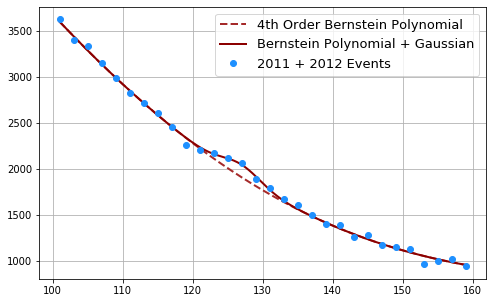

In [19]:
plt.figure(figsize=(8,5))
plt.plot(b3_x,bpoly_unc,'--',linewidth=2,color='brown', label='4th Order Bernstein Polynomial')
plt.plot(b3_x,signal(b3_x,*poptsignal_unc),linewidth=2,color='darkred', 
         label='Bernstein Polynomial + Gaussian')
plt.plot(b3,n3,'o',color='dodgerblue',label='2011 + 2012 Events')
plt.grid()
plt.legend(fontsize=13)

In [20]:
def gaussian(x,mu,sig,C):
    gaus= C*(1/sig/np.sqrt(2*np.pi))*np.exp(-((x-mu)**2)/(2*sig*sig))
    return gaus

In [21]:
from scipy.integrate import quad

/Users/ufukparildar/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([1.32606500e+02, 9.21894263e+00, 8.91839692e+02, 9.43300190e-01,
        1.00000000e+00, 5.32791328e+03, 5.95188352e+01]),
 array([8.76645109e-01, 1.00000000e+00, 3.63002957e+03, 6.29234039e+01]))

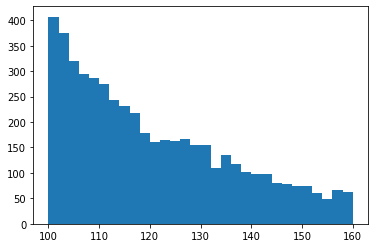

In [22]:
#cat1
num1,bins1,pat1 = plt.hist(invariant_mass[categ_Model10Categories==1],bins=30)
bins1 = (bins1[:-1] + bins1[1:]) / 2
popt_cat1, pcove = curve_fit(signal, bins1, num1 ,p0=[127,2,100,1,1,2e4,7e2])
poptbn_cat1, pcove = curve_fit(bernstein4_null, bins1, num1)
popt_cat1,poptbn_cat1

In [23]:
areagaus_1, err = quad(gaussian, 132.6-1.64*9.22, 127+1.64*9.22,
                     args=(1.32606500e+02, 9.21894263e+00, 8.91839692e+02))
areaberns_1, err = quad(bernstein4_null, 132.6-1.64*9.22, 132.6+1.64*9.22,
                     args=(8.76645109e-01, 1.00000000e+00, 3.63002957e+03, 6.29234039e+01))
w1=np.log(1+areagaus_1/areaberns_1)
w1

0.16649733502126213

(array([121.76512642,   4.31805346,  20.50036642,   0.83243827,
          1.        ,  86.53713974,   5.28062218]),
 array([ 0.67504378,  1.        , 60.78139787,  3.05476831]))

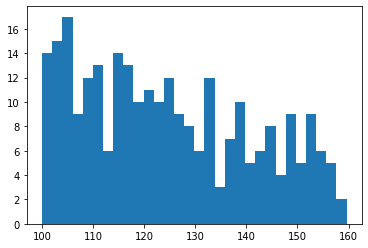

In [24]:
#cat2
num2,bins2,pat2 = plt.hist(invariant_mass[categ_Model10Categories==2],bins=30)
bins2 = (bins2[:-1] + bins2[1:]) / 2
popt_cat2, pcove = curve_fit(signal, bins2, num2 ,p0=[127,2,100,1,1,2e4,7e2])
poptbn_cat2, pcove = curve_fit(bernstein4_null, bins2, num2)
popt_cat2,poptbn_cat2

In [25]:
areagaus_2, err = quad(gaussian, 121.8-1.64*4.32, 121.8+1.64*4.32,
                     args=(121.76512642,   4.31805346,  20.50036642))
areaberns_2, err = quad(bernstein4_null, 121.8-1.64*4.32, 121.8+1.64*4.32,
                     args=(0.67504378,  1.        , 60.78139787,  3.05476831))
w2=np.log(1+areagaus_2/areaberns_2)
w2

0.12170605677707987

(array([1.28887765e+02, 1.85551350e+00, 2.88341288e+02, 7.37600777e-01,
        1.00000000e+00, 5.92470590e+03, 2.24678864e+02]),
 array([7.11617048e-01, 1.00000000e+00, 5.60091502e+03, 1.91577469e+02]))

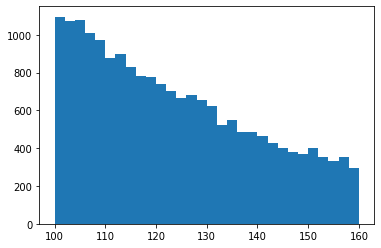

In [26]:
#cat3
num3,bins3,pat3 = plt.hist(invariant_mass[categ_Model10Categories==3],bins=30)
bins3 = (bins3[:-1] + bins3[1:]) / 2
popt_cat3, pcove = curve_fit(signal, bins3, num3 ,p0=[127,2,100,1,1,2e4,7e2])
poptbn_cat3, pcove = curve_fit(bernstein4_null, bins3, num3)
popt_cat3,poptbn_cat3

In [27]:
areagaus_3, err = quad(gaussian, 128.9-1.64*1.85, 128.9+1.64*1.85,
                     args=(1.28887765e+02, 1.85551350e+00, 2.88341288e+02))
areaberns_3, err = quad(bernstein4_null, 128.9-1.64*1.85, 128.9+1.64*1.85,
                     args=(7.11617048e-01, 1.00000000e+00, 5.60091502e+03, 1.91577469e+02))
w3=np.log(1+areagaus_3/areaberns_3)
w3

0.06678658835712911

(array([124.57371345,   1.55158579,  93.35002347,   0.81687163,
          1.        , 241.08152722,  29.04284435]),
 array([  0.58447136,   1.        , 167.48129734,  16.24514474]))

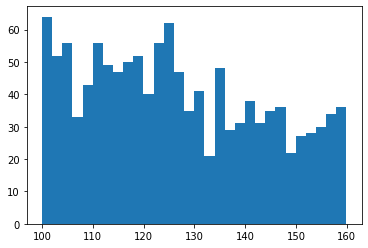

In [28]:
#cat4
num4,bins4,pat4 = plt.hist(invariant_mass[categ_Model10Categories==4],bins=30)
bins4 = (bins4[:-1] + bins4[1:]) / 2
popt_cat4, pcove = curve_fit(signal, bins4, num4 ,p0=[127,2,100,1,1,2e4,7e2])
poptbn_cat4, pcove = curve_fit(bernstein4_null, bins4, num4)
popt_cat4,poptbn_cat4

In [29]:
areagaus_4, err = quad(gaussian, 124.6-1.64*1.55, 124.6+1.64*1.55,
                     args=(124.57371345,   1.55158579,  93.35002347))
areaberns_4, err = quad(bernstein4_null, 124.6-1.64*1.55, 124.6+1.64*1.55,
                     args=(0.58447136,   1.        , 167.48129734,  16.24514474))
w4=np.log(1+areagaus_4/areaberns_4)
w4

0.32400654699920073

(array([1.26318820e+02, 1.59124781e+00, 1.27373566e+02, 8.80282615e-01,
        1.00000000e+00, 2.55126162e+03, 4.37586983e+01]),
 array([8.47711561e-01, 1.00000000e+00, 2.22089370e+03, 3.92166818e+01]))

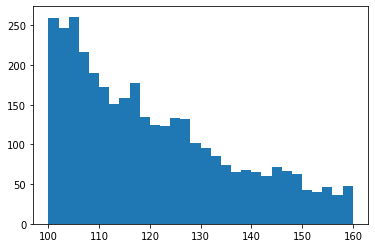

In [30]:
#cat5
num5,bins5,pat5 = plt.hist(invariant_mass[categ_Model10Categories==5],bins=30)
bins5 = (bins5[:-1] + bins5[1:]) / 2
popt_cat5, pcove = curve_fit(signal, bins5, num5 ,p0=[127,2,100,1,1,2e4,7e2])
poptbn_cat5, pcove = curve_fit(bernstein4_null, bins5, num5)
popt_cat5,poptbn_cat5

In [31]:
areagaus_5, err = quad(gaussian, 126.3-1.64*1.59, 126.3+1.64*1.59,
                     args=(1.26318820e+02, 1.59124781e+00, 1.27373566e+02))
areaberns_5, err = quad(bernstein4_null, 126.3-1.64*1.59, 126.3+1.64*1.59,
                     args=(8.47711561e-01, 1.00000000e+00, 2.22089370e+03, 3.92166818e+01))
w5=np.log(1+areagaus_5/areaberns_5)
w5

0.18103696872716285

(array([134.97531728,   4.70236998,  37.91459679,   1.01104716,
          1.        , 240.80149346,   3.22936551]),
 array([  0.98588716,   1.        , 177.92085852,   4.08710277]))

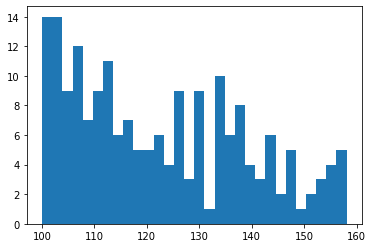

In [32]:
#cat6
num6,bins6,pat6 = plt.hist(invariant_mass[categ_Model10Categories==6],bins=30)
bins6 = (bins6[:-1] + bins6[1:]) / 2
popt_cat6, pcove = curve_fit(signal, bins6, num6 ,p0=[127,2,100,1,1,2e4,7e2])
poptbn_cat6, pcove = curve_fit(bernstein4_null, bins6, num6)
popt_cat6,poptbn_cat6

In [33]:
areagaus_6, err = quad(gaussian, 135.-1.64*4.7, 135.+1.64*4.7,
                     args=(134.97531728,   4.70236998,  37.91459679))
areaberns_6, err = quad(bernstein4_null, 135.-1.64*4.7, 135.+1.64*4.7,
                     args=(0.98588716,   1.        , 177.92085852,   4.08710277))
w6=np.log(1+areagaus_6/areaberns_6)
w6

0.39060030805001794

(array([1.07076657e+02, 2.65834309e+01, 1.34338375e+04, 8.37472228e-01,
        1.00000000e+00, 6.54151412e+03, 2.71509403e+02]),
 array([7.42530184e-01, 1.00000000e+00, 6.26141750e+03, 2.22981116e+02]))

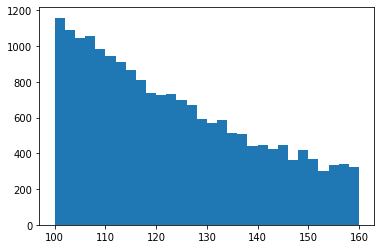

In [34]:
#cat7
num7,bins7,pat7 = plt.hist(invariant_mass[categ_Model10Categories==7],bins=30)
bins7 = (bins7[:-1] + bins7[1:]) / 2
popt_cat7, pcove = curve_fit(signal, bins7, num7 ,p0=[127,2,100,1,1,2e4,7e2])
poptbn_cat7, pcove = curve_fit(bernstein4_null, bins7, num7)
popt_cat7,poptbn_cat7

In [35]:
areagaus_7, err = quad(gaussian, 107.1-1.64*2.66, 107.1+1.64*2.66,
                     args=(1.07076657e+02, 2.65834309e+01, 1.34338375e+04))
areaberns_7, err = quad(bernstein4_null, 107.1-1.64*2.66, 107.1+1.64*2.66,
                     args=(7.42530184e-01, 1.00000000e+00, 6.26141750e+03, 2.22981116e+02))
w7=np.log(1+areagaus_7/areaberns_7)
w7

0.17954449996280328

(array([1.21809686e+02, 9.77016435e+00, 3.44508141e+02, 1.10880076e+00,
        1.00000000e+00, 1.26373539e+03, 2.96141185e+01]),
 array([  0.65061198,   1.        , 187.03763845,  19.70267413]))

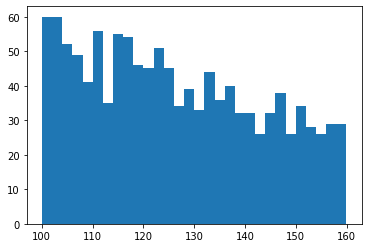

In [36]:
#cat8
num8,bins8,pat8 = plt.hist(invariant_mass[categ_Model10Categories==8],bins=30)
bins8 = (bins8[:-1] + bins8[1:]) / 2
popt_cat8, pcove = curve_fit(signal, bins8, num8 ,p0=[127,2,100,1,1,2e4,7e2])
poptbn_cat8, pcove = curve_fit(bernstein4_null, bins8, num8)
popt_cat8,poptbn_cat8

In [37]:
areagaus_8, err = quad(gaussian, 121.8-1.64*9.77, 121.8+1.64*9.77,
                     args=(1.21809686e+02, 9.77016435e+00, 3.44508141e+02))
areaberns_8, err = quad(bernstein4_null, 121.8-1.64*9.77, 121.8+1.64*9.77,
                     args=(0.65061198,   1.        , 187.03763845,  19.70267413))
w8=np.log(1+areagaus_8/areaberns_8)
w8

0.1985576485566569

(array([1.32486476e+02, 8.46271039e+00, 6.68024295e+02, 8.14184366e-01,
        1.00000000e+00, 3.53592797e+03, 1.25236453e+02]),
 array([7.38900612e-01, 1.00000000e+00, 2.77207994e+03, 9.93160712e+01]))

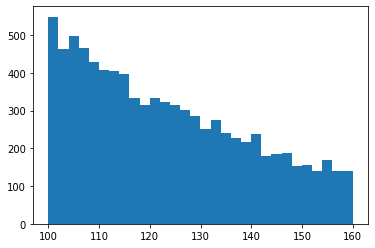

In [38]:
#cat9
num9,bins9,pat9 = plt.hist(invariant_mass[categ_Model10Categories==9],bins=30)
bins9 = (bins9[:-1] + bins9[1:]) / 2
popt_cat9, pcove = curve_fit(signal, bins9, num9 ,p0=[127,2,100,1,1,2e4,7e2])
poptbn_cat9, pcove = curve_fit(bernstein4_null, bins9, num9)
popt_cat9,poptbn_cat9

In [39]:
areagaus_9, err = quad(gaussian, 132.5-1.64*8.46, 132.5+1.64*8.46,
                     args=(1.32486476e+02, 8.46271039e+00, 6.68024295e+02))
areaberns_9, err = quad(bernstein4_null, 132.5-1.64*8.46, 132.5+1.64*8.46,
                     args=(7.38900612e-01, 1.00000000e+00, 2.77207994e+03, 9.93160712e+01))
w9=np.log(1+areagaus_9/areaberns_9)
w9

0.08052748238801898

(array([  1.        ,   1.        ,   1.        ,   0.31479035,
          1.        , 113.91833465, -27.7203299 ]),
 array([  0.31479035,   1.        , 113.91833465, -27.7203299 ]))

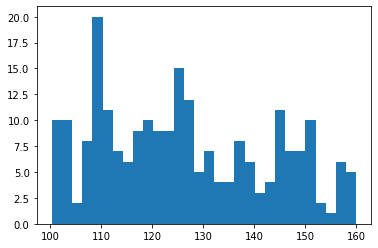

In [40]:
#cat10
num10,bins10,pat10 = plt.hist(invariant_mass[categ_Model10Categories==10],bins=30)
bins10 = (bins10[:-1] + bins10[1:]) / 2
popt_cat10, pcove = curve_fit(signal, bins10, num10 )
poptbn_cat10, pcove = curve_fit(bernstein4_null, bins10, num10)
popt_cat10,poptbn_cat10

In [41]:
areagaus_10, err = quad(gaussian, 1-1.64*1, 1+1.64*1,
                     args=(1.        ,   1.        ,   1.        ))
areaberns_10, err = quad(bernstein4_null, 1-1.64*1, 1+1.64*1,
                     args=(0.31479035,   1.        , 113.91833465, -27.7203299))
w10=np.log(1+areagaus_10/areaberns_10)
w10

-0.01026536903878998

In [42]:
weights = np.zeros(len(invariant_mass))

#weigths according to fwhm
'''weights[categ_Model10Categories==1] = 3.4
weights[categ_Model10Categories==2] = 3.2
weights[categ_Model10Categories==3] = 3.7
weights[categ_Model10Categories==4] = 3.6
weights[categ_Model10Categories==5] = 3.9
weights[categ_Model10Categories==6] = 3.5
weights[categ_Model10Categories==7] = 4.5
weights[categ_Model10Categories==8] = 3.9
weights[categ_Model10Categories==9] = 6.1
weights[categ_Model10Categories==10] = 3.7'''

'''#weights according to expected number of events
weights[categ_Model10Categories==1] = 10.5 + 14.2
weights[categ_Model10Categories==2] = 1.5 + 2.5 
weights[categ_Model10Categories==3] = 21.6 + 30.9
weights[categ_Model10Categories==4] = 2.8 + 5.2 
weights[categ_Model10Categories==5] = 6.7 + 8.9
weights[categ_Model10Categories==6] = 1.0 + 1.6
weights[categ_Model10Categories==7] = 21.1 + 26.9
weights[categ_Model10Categories==8] = 2.7 + 4.5
weights[categ_Model10Categories==9] = 9.5 + 12.8
weights[categ_Model10Categories==10] = 2.2 + 3.0
weights = weights/(79.6 + 110.5) #normalize the weights to 1'''

weights[categ_Model10Categories==1] = w1
weights[categ_Model10Categories==2] = w2
weights[categ_Model10Categories==3] = w3
weights[categ_Model10Categories==4] = w4
weights[categ_Model10Categories==5] = w5
weights[categ_Model10Categories==6] = w6
weights[categ_Model10Categories==7] = w7
weights[categ_Model10Categories==8] = w8
weights[categ_Model10Categories==9] = w9
weights[categ_Model10Categories==10] = w10
weights

array([0.06678659, 0.08052748, 0.08052748, ..., 0.1795445 , 0.08052748,
       0.16649734])

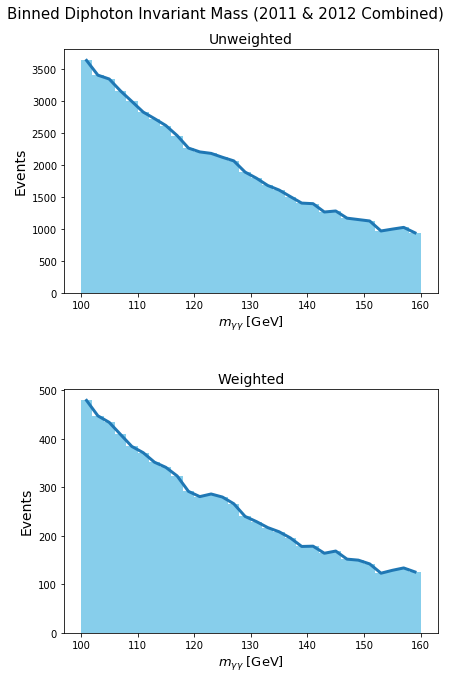

In [43]:
fig,axs = plt.subplots(2,1,figsize=(7,10))
fig.suptitle('Binned Diphoton Invariant Mass (2011 & 2012 Combined)',size=15)
nums,bins,pat = axs[1].hist(invariant_mass,weights=weights,bins=30,density=False,color='skyblue')
n3,b3,p3 = axs[0].hist(invariant_mass,bins=30,color='skyblue')
bins = (bins[:-1] + bins[1:]) / 2
b3 = (b3[:-1] + b3[1:]) / 2

axs[1].plot(bins,nums,linewidth=3)
axs[0].plot(b3,n3,linewidth=3)


axs[0].set_title('Unweighted',size=14)
axs[1].set_title('Weighted',size=14)

axs[0].set_ylabel('Events',size=14)
axs[1].set_ylabel('Events',size=14)
axs[0].set_xlabel('$m_{\gamma\gamma}$ [GeV]',size=13)
axs[1].set_xlabel('$m_{\gamma\gamma}$ [GeV]',size=13)

fig.tight_layout(pad=4)

#plt.savefig('Bins_wanduw.png')

In [44]:
poptsignal_c, pcove = curve_fit(signal, bins, nums,p0=[127,2,100,1,1,2e4,7e2])
poptsignal_c

/Users/ufukparildar/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([1.25790886e+02, 1.99639262e+00, 1.12618122e+02, 7.88406434e-01,
       1.00000000e+00, 2.89725905e+03, 1.05073474e+02])

In [45]:
#fwhm unc
poptsignal_c[1]*2*np.sqrt(2*np.log(2))

4.701145361974945

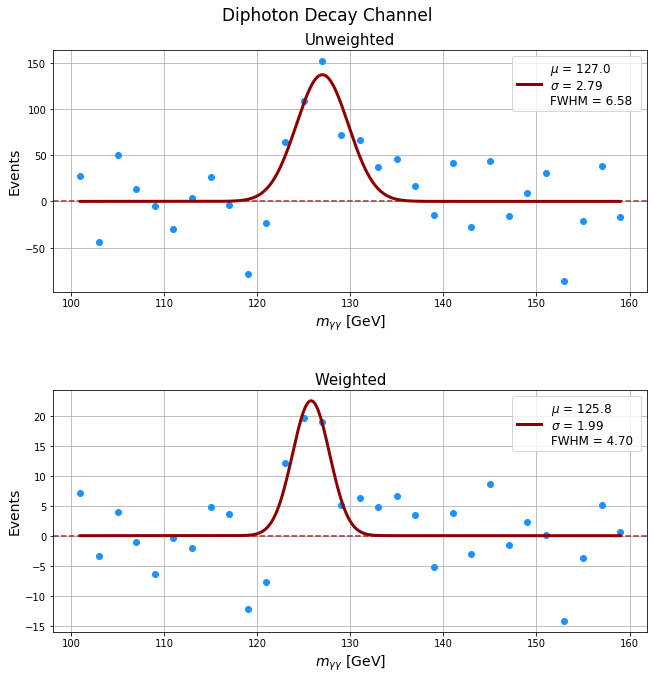

In [46]:
fig,axs=plt.subplots(2,1,figsize=(10,10))

gaus_unc= 9.6e2*(1/2.79/np.sqrt(2*np.pi))*np.exp(-((b3-127)**2)/(2*2.79*2.79))
bpoly_unc= signal(b3,*poptsignal_unc) - gaus_unc

gaus_c= 1.126e2*(1/1.996/np.sqrt(2*np.pi))*np.exp(-((bins-125.79)**2)/(2*1.99*1.99))
bpoly_c= signal(bins,*poptsignal_c) - gaus_c

axs[0].axhline(0,color='brown',linestyle='--')
axs[0].plot(b3,n3-bpoly_unc,'o',color='dodgerblue')

axs[1].axhline(0,color='brown',linestyle='--')
axs[1].plot(bins,nums-bpoly_c,'o',color='dodgerblue')


b3_x = np.linspace(b3[0],b3[29],1000)
bins_x= np.linspace(bins[0],bins[29],1000)

gaus_unc= 9.6e2*(1/2.79/np.sqrt(2*np.pi))*np.exp(-((b3_x-127)**2)/(2*2.79*2.79))
bpoly_unc= signal(b3_x,*poptsignal_unc) - gaus_unc

gaus_c= 1.126e2*(1/1.996/np.sqrt(2*np.pi))*np.exp(-((bins_x-125.79)**2)/(2*1.99*1.99))
bpoly_c= signal(bins_x,*poptsignal_c) - gaus_c

axs[0].plot(b3_x ,gaus_unc,linewidth='3', color='darkred',
         label='$\mu$ = 127.0 \n$\sigma$ = 2.79 \nFWHM = 6.58 ')
axs[1].plot(bins_x ,gaus_c,linewidth='3', color='darkred',
         label='$\mu$ = 125.8 \n$\sigma$ = 1.99 \nFWHM = 4.70 ')

#axs[0].set_ylim(-200,200)
axs[0].grid()
axs[0].legend(fontsize=12,loc='upper right')
axs[0].set_ylabel('Events',size=14)
axs[0].set_xlabel('$m_{\gamma\gamma}$ [GeV]',size=14)
axs[0].set_title('Unweighted',size=15)

axs[1].grid()
axs[1].legend(fontsize=12,loc='upper right')
axs[1].set_ylabel('Events',size=14)
axs[1].set_xlabel('$m_{\gamma\gamma}$ [GeV]',size=14)
axs[1].set_title('Weighted',size=15)

fig.suptitle('Diphoton Decay Channel',size=17)

fig.tight_layout(pad=4)
#plt.savefig('Gaussians.png')

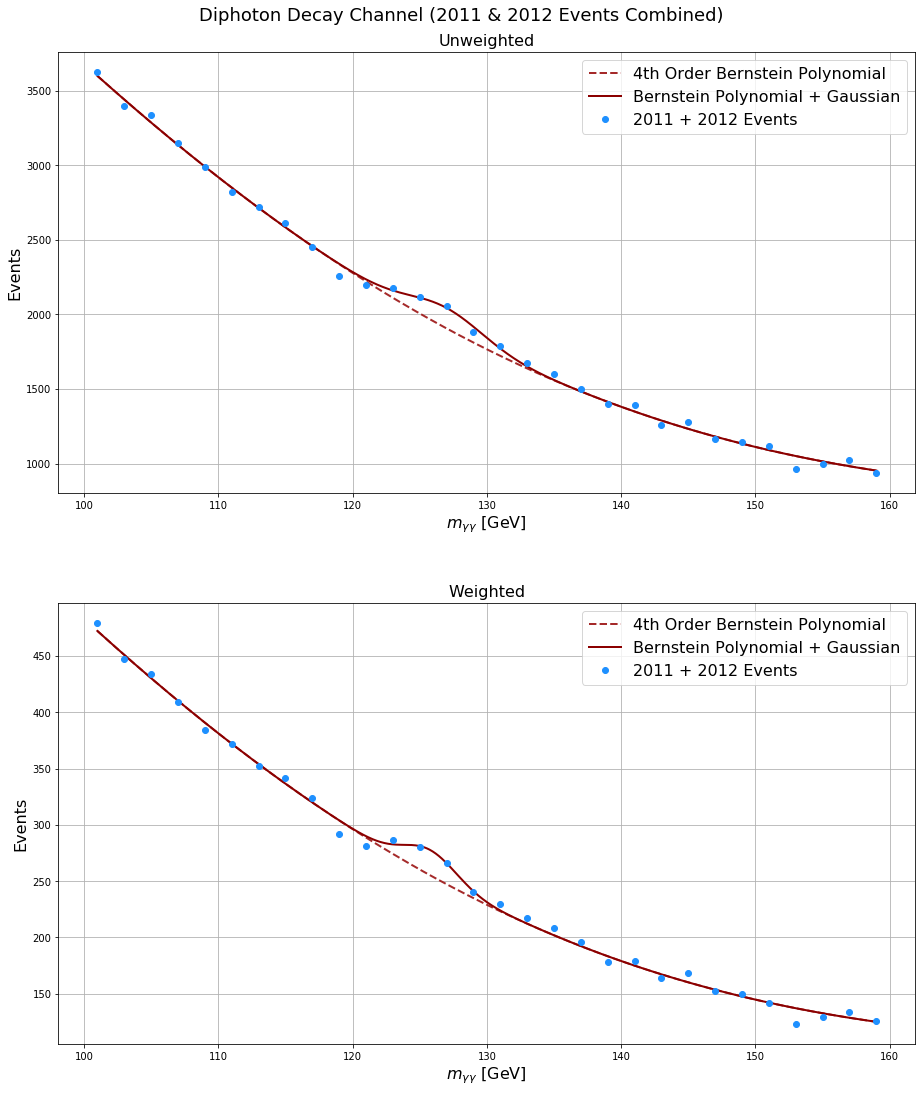

In [53]:
fig,axs = plt.subplots(2,1,figsize=(14,16))
fig.suptitle('Diphoton Decay Channel (2011 & 2012 Events Combined)',size=18)

axs[0].set_title('Unweighted',size=16)
axs[0].set_ylabel('Events',size=16)
axs[0].set_xlabel('$m_{\gamma \gamma}$ [GeV]',size=16)
axs[0].plot(b3_x,bpoly_unc,'--',linewidth=2,color='brown', label='4th Order Bernstein Polynomial')
axs[0].plot(b3_x,signal(b3_x,*poptsignal_unc),linewidth=2,color='darkred', 
         label='Bernstein Polynomial + Gaussian')
axs[0].plot(b3,n3,'o',color='dodgerblue',label='2011 + 2012 Events')
axs[0].grid()
axs[0].legend(fontsize=16)


axs[1].set_title('Weighted',size=16)
axs[1].plot(bins_x,bpoly_c,'--',linewidth=2,color='brown', label='4th Order Bernstein Polynomial')
axs[1].plot(bins_x,signal(bins_x,*poptsignal_c),linewidth=2,color='darkred', 
         label='Bernstein Polynomial + Gaussian')
axs[1].plot(bins,nums,'o',color='dodgerblue',label='2011 + 2012 Events')
axs[1].grid()
axs[1].legend(fontsize=16)
axs[1].set_xlabel('$m_{\gamma \gamma}$ [GeV]',size=16)
axs[1].set_ylabel('Events',size=16)

fig.tight_layout(pad=5)
#plt.savefig('Bernstein_and_Gaus.png')

In [48]:
'''invariant_mass_10=invariant_mass[categ_Model10Categories==10]
invariant_mass_10= invariant_mass_10[invariant_mass_10 < 1+1.64*1]
invariant_mass_10= invariant_mass_10[1-1.64*1 <invariant_mass_10 ]

invariant_mass_9= invariant_mass[categ_Model10Categories==9]
invariant_mass_9= invariant_mass_9[132.5-1.64*8.46 <invariant_mass_9]
invariant_mass_9= invariant_mass_9[invariant_mass_9 < 132.5+1.64*8.46]

invariant_mass_8= invariant_mass[categ_Model10Categories==8]
invariant_mass_8= invariant_mass_8[121.8-1.64*9.77 <invariant_mass_8]
invariant_mass_8= invariant_mass_8[invariant_mass_8 < 121.8+1.64*9.77]

invariant_mass_7= invariant_mass[categ_Model10Categories==7]
invariant_mass_7= invariant_mass_7[107.1-1.64*2.66 <invariant_mass_7]
invariant_mass_7= invariant_mass_7[invariant_mass_7 < 107.1+1.64*2.66]

invariant_mass_6= invariant_mass[categ_Model10Categories==6]
invariant_mass_6= invariant_mass_6[135.-1.64*4.7 <invariant_mass_6]
invariant_mass_6= invariant_mass_6[invariant_mass_6 < 135.+1.64*4.7]

invariant_mass_5= invariant_mass[categ_Model10Categories==5]
invariant_mass_5= invariant_mass_5[126.3-1.64*1.59 <invariant_mass_5]
invariant_mass_5= invariant_mass_5[invariant_mass_5 < 126.3+1.64*1.59]

invariant_mass_4= invariant_mass[categ_Model10Categories==4]
invariant_mass_4= invariant_mass_4[124.6-1.64*1.55 <invariant_mass_4]
invariant_mass_4= invariant_mass_4[invariant_mass_4 < 124.6+1.64*1.55]

invariant_mass_3= invariant_mass[categ_Model10Categories==3]
invariant_mass_3= invariant_mass_3[128.9-1.64*1.85 <invariant_mass_3]
invariant_mass_3= invariant_mass_3[invariant_mass_3 < 128.9+1.64*1.85]

invariant_mass_2= invariant_mass[categ_Model10Categories==2]
invariant_mass_2= invariant_mass_2[121.8-1.64*4.32 <invariant_mass_2]
invariant_mass_2= invariant_mass_2[invariant_mass_2 < 121.8+1.64*4.32]

invariant_mass_1= invariant_mass[categ_Model10Categories==1]
invariant_mass_1= invariant_mass_1[132.6-1.64*9.22 <invariant_mass_1]
invariant_mass_1= invariant_mass_1[invariant_mass_1 < 132.6+1.64*9.22]
'''

'invariant_mass_10=invariant_mass[categ_Model10Categories==10]\ninvariant_mass_10= invariant_mass_10[invariant_mass_10 < 1+1.64*1]\ninvariant_mass_10= invariant_mass_10[1-1.64*1 <invariant_mass_10 ]\n\ninvariant_mass_9= invariant_mass[categ_Model10Categories==9]\ninvariant_mass_9= invariant_mass_9[132.5-1.64*8.46 <invariant_mass_9]\ninvariant_mass_9= invariant_mass_9[invariant_mass_9 < 132.5+1.64*8.46]\n\ninvariant_mass_8= invariant_mass[categ_Model10Categories==8]\ninvariant_mass_8= invariant_mass_8[121.8-1.64*9.77 <invariant_mass_8]\ninvariant_mass_8= invariant_mass_8[invariant_mass_8 < 121.8+1.64*9.77]\n\ninvariant_mass_7= invariant_mass[categ_Model10Categories==7]\ninvariant_mass_7= invariant_mass_7[107.1-1.64*2.66 <invariant_mass_7]\ninvariant_mass_7= invariant_mass_7[invariant_mass_7 < 107.1+1.64*2.66]\n\ninvariant_mass_6= invariant_mass[categ_Model10Categories==6]\ninvariant_mass_6= invariant_mass_6[135.-1.64*4.7 <invariant_mass_6]\ninvariant_mass_6= invariant_mass_6[invariant_m

In [49]:
'''invariant_mass_90CL = np.concatenate((invariant_mass_1,invariant_mass_2,invariant_mass_4,invariant_mass_4,
                                    invariant_mass_5,invariant_mass_6,invariant_mass_7,
                                    invariant_mass_8,invariant_mass_9,invariant_mass_10))'''

'invariant_mass_90CL = np.concatenate((invariant_mass_1,invariant_mass_2,invariant_mass_4,invariant_mass_4,\n                                    invariant_mass_5,invariant_mass_6,invariant_mass_7,\n                                    invariant_mass_8,invariant_mass_9,invariant_mass_10))'

In [50]:
'''nums90CL,bins90CL,pat90CL = plt.hist(invariant_mass_90CL,bins=30,density=False,color='skyblue')'''

"nums90CL,bins90CL,pat90CL = plt.hist(invariant_mass_90CL,bins=30,density=False,color='skyblue')"